In the previous transfer learning technique, we were able to reach validation accuracy of around 93% and training accuracy of 99% which is a clear case of overfitting. In this code, we will try to use data augmentation technique basically creation similar fake data to reduce overfitting and make our model behave more generalized.

## Step 1: Import Libraries

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
(train_data, test_data), info = tfds.load('cats_vs_dogs',
                                          split=['train[:80%]', 'train[80%:]'],
                                          with_info=True, as_supervised=True)

# Step 2: Preprocess and Data Augumentation
Perform necessary preprocessing steps like resizing, normalization and data augumentation

In [4]:
# Define preprocessing function
def preprocess_img(image, label):
    image = tf.image.resize(image, (256, 256))
    image = tf.cast(image, tf.float32) / 255.0  # Cast image to float32 and normalize
    return image, label

# Apply augmentation to training data only
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,             # Rescale pixel values to range [0,1]
    shear_range=0.2,            # Shear transformations
    zoom_range=0.2,             # Zoom transformations
    horizontal_flip=True       # Horizontal flipping
)

# Apply only rescaling to test data
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Preprocess and create generator for training data
train_data_gen = train_data.map(preprocess_img)
train_data_gen = train_data_gen.shuffle(1000).batch(batch_size)

# Preprocess and create generator for test data
test_data_gen = test_data.map(preprocess_img)
test_data_gen = test_data_gen.batch(batch_size)


# Step 3: Using Transfer Learning VGG16 Model

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [12]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)

In [13]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
conv_base.trainable = False

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(
    train_data_gen,
    epochs=10,
    validation_data=test_data_gen
)

Epoch 1/10
582/582 [==============================] - 145s 226ms/step - loss: 0.2870 - accuracy: 0.8970 - val_loss: 0.1487 - val_accuracy: 0.9357
Epoch 2/10
582/582 [==============================] - 141s 240ms/step - loss: 0.1290 - accuracy: 0.9473 - val_loss: 0.1445 - val_accuracy: 0.9405
Epoch 3/10
582/582 [==============================] - 142s 240ms/step - loss: 0.0907 - accuracy: 0.9632 - val_loss: 0.1489 - val_accuracy: 0.9364
Epoch 4/10
582/582 [==============================] - 124s 209ms/step - loss: 0.0670 - accuracy: 0.9726 - val_loss: 0.2020 - val_accuracy: 0.9265
Epoch 5/10
582/582 [==============================] - 124s 210ms/step - loss: 0.0548 - accuracy: 0.9780 - val_loss: 0.2416 - val_accuracy: 0.9261
Epoch 6/10
582/582 [==============================] - 123s 208ms/step - loss: 0.0460 - accuracy: 0.9822 - val_loss: 0.2032 - val_accuracy: 0.9374
Epoch 7/10
582/582 [==============================] - 123s 209ms/step - loss: 0.0339 - accuracy: 0.9862 - val_loss: 0.2883 -

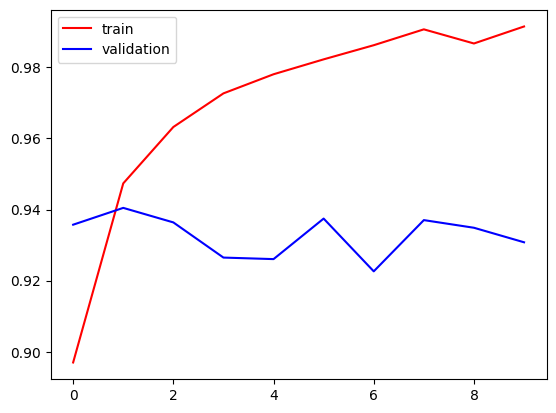

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

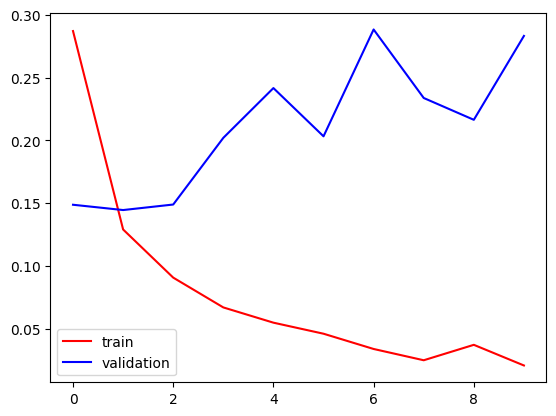

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()